## Assignment 1
## Akarsh Kumar Sahu

# # Part A

In [142]:
import random
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Importing some of my preferred plotting settings
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['lines.linewidth'] = 3

In [143]:
# 1. Import full data set using Pandas

data = pd.read_csv('Assignment 1/bottle.csv')
data.head()

C:\Users\akars\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
# 2. Limit the dataset to the following columns: [T_degC, Salnty, STheta] and then remove all NaN and NA values
data = data[['T_degC', 'Salnty', 'STheta']]
df = data.dropna()
df.shape

(812174, 3)

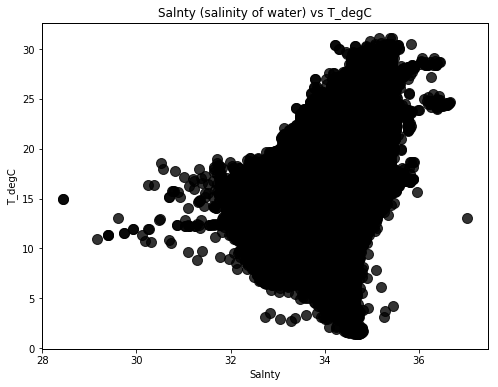

In [145]:
# 3.a Visualize the Salnty (salinity of water) vs T_degC
plt.figure(figsize=(8,6))
plt.scatter(df.Salnty, df.T_degC, s=100, c='black', alpha = 0.8)
plt.title('Salnty (salinity of water) vs T_degC')
plt.xlabel('Salnty')
plt.ylabel('T_degC')
plt.show()



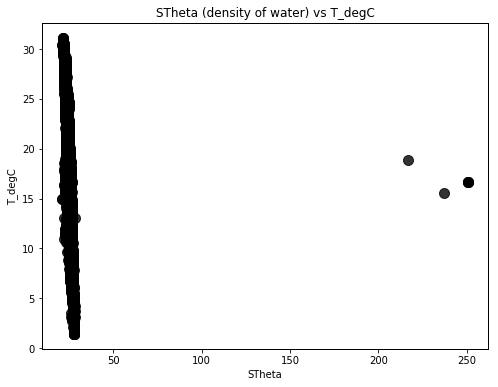

In [146]:
# 3.b Visualize the STheta (density of water) vs T_degC
plt.figure(figsize=(8,6))
plt.scatter(df.STheta, df.T_degC, s=100, c='black', alpha = 0.8)
plt.title('STheta (density of water) vs T_degC')
plt.xlabel('STheta')
plt.ylabel('T_degC')
plt.show()

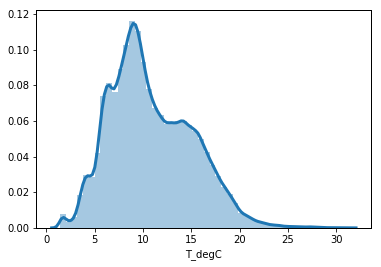

In [147]:
# 4.a Distribution of T_degC
sns.distplot(df.T_degC);

In [153]:
# Remove obvious outliers from step 3b, Shape for clean data will be: (812168, 3)

## We will check the outliers in all the 3 variables using z-score(if z-score > 5)
from scipy import stats
z = np.abs(stats.zscore(df.STheta))
#df_1 = df.mask((df - df.mean()).abs() > 3* df.std()).dropna()
#df_1.shape
df_1 = df[z < 5]

As can be seen in the below plot, there are no outliers in STheta variable and plot looks good.

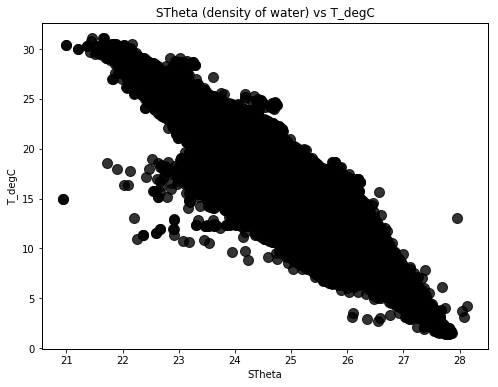

In [154]:
# 6. Plot 3b again
plt.figure(figsize=(8,6))
plt.scatter(df_1.STheta, df_1.T_degC, s=100, c='black', alpha = 0.8)
plt.title('STheta (density of water) vs T_degC')
plt.xlabel('STheta')
plt.ylabel('T_degC')
plt.show()

# # Part B

In [160]:
# 1. Train & Test Split using sklearn

from sklearn.model_selection import train_test_split

X, y = df_1[['STheta', 'Salnty']].to_numpy(), df_1[['T_degC']].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [161]:
X_train

array([[24.7422, 33.5593],
       [24.089 , 33.485 ],
       [25.586 , 33.453 ],
       ...,
       [26.347 , 34.22  ],
       [26.409 , 34.044 ],
       [24.458 , 33.47  ]])

In [162]:
X_train_b

array([[ 1.   , 25.301, 33.634],
       [ 1.   , 25.74 , 33.648],
       [ 1.   , 26.546, 34.144],
       ...,
       [ 1.   , 26.347, 34.22 ],
       [ 1.   , 26.409, 34.044],
       [ 1.   , 24.458, 33.47 ]])

# # Part C

In [163]:
# 1. Build the normal equation using numpy & fit using your training data (X_train & y_train)

## Add intercept to X_train
X_train_b = np.c_[np.ones((len(X_train), 1)), X_train]
theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)


In [164]:
# 2. Print out the coefficients - we will need to compare these to the output in Part 4
print(theta_best)

[[35.64451188]
 [-5.03907257]
 [ 3.11151204]]


In [165]:
# 3. Predict T_degC for the test data using the fitted values in b.

X_test_b = np.c_[np.ones((len(X_test), 1)), X_test]
y_pred = X_test_b.dot(theta_best)
y_pred

array([[ 7.88437556],
       [ 7.14969722],
       [ 5.22668207],
       ...,
       [ 7.14752462],
       [16.11974133],
       [15.64019849]])

In [166]:
# 4. Calculate Metrics

## Mean Square Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error( y_test, y_pred)
print('Mean Squared Error: ' + str(mse))

## r-squared
from sklearn.metrics import r2_score
r2 = r2_score( y_test, y_pred)
print('R-Squared: ' + str(r2))

## explained variance
from sklearn.metrics import explained_variance_score
exp_var = explained_variance_score( y_test, y_pred)
print('Explained_variance_score: ' + str(exp_var))

Mean Squared Error: 0.2337830143178298
R-Squared: 0.9868919565634433
Explained_variance_score: 0.9868919614560928


In [167]:
x = y_pred.flatten().tolist()
[i for i in x if i < -300]

[]

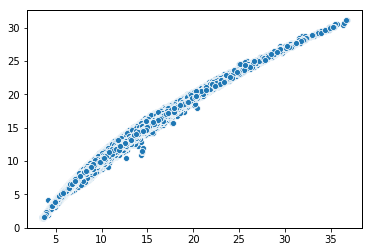

In [169]:
# 5.Create a scatterplot that shows actual versus predicted values for the T_degC

sns.scatterplot(x = y_pred.flatten().tolist(), y = y_test.flatten().tolist());

In [175]:
# 1. Create an instance of the LinearRegression class called "lin_reg". Fit lin_reg using X_train & y_train.

from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [190]:
# 2. Print out the coefficients (including the intercept)
theta_sklearn = lin_reg.coef_

df_2 = pd.DataFrame(data = [theta_best.flatten().tolist()[1:3], theta_sklearn.flatten().tolist()], columns = ['Coef_Normal_Eq', 'Coef_Sklearn'])
df_2

As can be seen, the coefficients from sklearn linear_model is exactly same as coefficients from Normal equations 

In [193]:
# 3. Predict T_degC for the test data using the fitted values in b.
y_pred_sklearn = lin_reg.predict(X_test)
y_pred_sklearn

array([[ 7.88437556],
       [ 7.14969722],
       [ 5.22668207],
       ...,
       [ 7.14752462],
       [16.11974133],
       [15.64019849]])

In [194]:
# 4. Calculate the following for the test data

## Mean Square Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error( y_test, y_pred_sklearn)
print('Mean Squared Error: ' + str(mse))

## r-squared
from sklearn.metrics import r2_score
r2 = r2_score( y_test, y_pred_sklearn)
print('R-Squared: ' + str(r2))

## explained variance
from sklearn.metrics import explained_variance_score
exp_var = explained_variance_score( y_test, y_pred_sklearn)
print('Explained_variance_score: ' + str(exp_var))

Mean Squared Error: 0.23378301431811935
R-Squared: 0.9868919565634271
Explained_variance_score: 0.9868919614560767


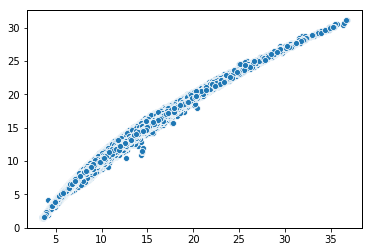

In [195]:
# 5. Create a scatterplot that shows actual versus predicted values for the T_degC.
sns.scatterplot(x = y_pred_sklearn.flatten().tolist(), y = y_test.flatten().tolist());

# # Part E